# Task 2: K- Means Clustering is an Unsupervised Machine Learning
This Jupyter notebook will explain the iris dataset of K-Means Clustering.

# Author:Geethaarumugam

Import the libraries

In [1]:
import os # assigning file path
import numpy as np # mathematical calculation
import pandas as pd # importing, data manipulation
import seaborn as sns # statistics and visualisation
import matplotlib.pyplot as plt # data visualisation
%matplotlib inline

In [3]:
os.chdir("D:\\Mohankumar files\\R\\Python")

In [6]:
Cluster = pd.read_csv('Iris.csv')
Cluster.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Finding the optimum number of clusters for k-means classification

In [12]:
x = Cluster.iloc[:, [0, 1, 2, 3]].values
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [13]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans = KMeans (n_clusters = i, init = 'k-means++')
    #init = centroid initialization
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, 
# Allowing us to observe 'The elbow method

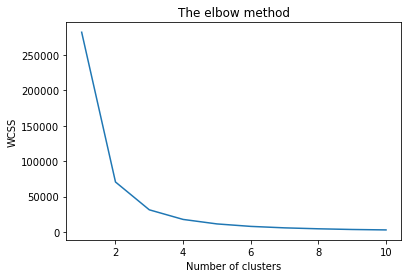

In [16]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [17]:
wcss

[281831.54466666654,
 70581.3808,
 31320.711199999994,
 17757.654893314375,
 11422.5293885799,
 7934.569565242165,
 5872.076666666666,
 4543.242315961473,
 3564.728958333334,
 2961.29118452381]

In [19]:
kmeans = KMeans(n_clusters =5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
pd.concat([Cluster,pd.DataFrame(y_kmeans)],axis=1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,0
0,1,5.1,3.5,1.4,0.2,Iris-setosa,4
1,2,4.9,3.0,1.4,0.2,Iris-setosa,4
2,3,4.7,3.2,1.3,0.2,Iris-setosa,4
3,4,4.6,3.1,1.5,0.2,Iris-setosa,4
4,5,5.0,3.6,1.4,0.2,Iris-setosa,4
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1


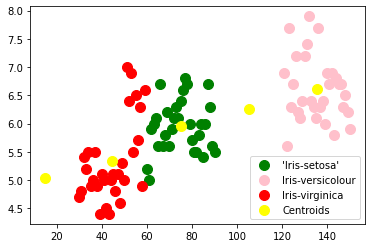

In [25]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='green',label="'Iris-setosa'")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='pink',label="Iris-versicolour")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='red',label="Iris-virginica")


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

Text(0, 0.5, 'Euclidean Distances Method')

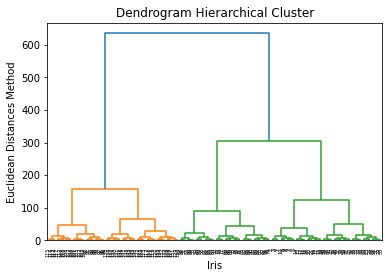

In [27]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
# ward = pair / connector
plt.title("Dendrogram Hierarchical Cluster")
plt.xlabel("Iris")
plt.ylabel("Euclidean Distances Method")

In [28]:
from sklearn.cluster import AgglomerativeClustering
# alogrithm- AgglomerativeClustering
# Bottom-up concept
hie_cluster = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage='ward')
# affinity - approach is distance formula -
hie_cluster

AgglomerativeClustering(n_clusters=5)

In [30]:
y_hc = hie_cluster.fit_predict(x)
y_hc

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [31]:
pd.concat([Cluster, pd.DataFrame(y_hc)], axis=1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,0
0,1,5.1,3.5,1.4,0.2,Iris-setosa,4
1,2,4.9,3.0,1.4,0.2,Iris-setosa,4
2,3,4.7,3.2,1.3,0.2,Iris-setosa,4
3,4,4.6,3.1,1.5,0.2,Iris-setosa,4
4,5,5.0,3.6,1.4,0.2,Iris-setosa,4
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1


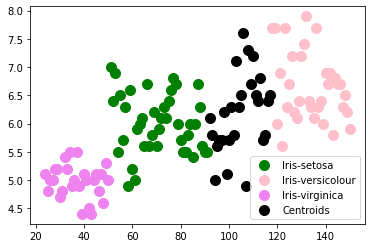

In [33]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='green',label="Iris-setosa")
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='pink',label="Iris-versicolour")
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='violet',label="Iris-virginica")
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='black',label="Centroids")
plt.legend()